In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


### This is my first Machine Learning Project on a Healthcare dataset. The goal of this analysis is to predict whether a patient has diabetes or not based on a set of features. We'll use linear regression for this purpose, as I'm still not familiar with other machine learning algorithms.. 
### Update: After finishing the first course of the Machine learning specialization and the first course of the deep learning specialization I gained a beginner level understanding of Logistic Regression and Neural Networks; Returning back to this project I'll be implementing the concepts I've learned from scratch..

## Importing necessary Libraries

In [2]:
import pandas as pd 
import numpy as np
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

## Loading DataSet

In [3]:
# Loading dataset
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Data Exploration 

#### 1. Informations about the overall shape of the data 

In [25]:
print (df.info())
print (df.describe().T)
print(df.shape)
print (df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99982 entries, 0 to 99981
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     99982 non-null  object 
 1   age                        99982 non-null  float64
 2   hypertension               99982 non-null  int64  
 3   heart_disease              99982 non-null  int64  
 4   smoking_history            99982 non-null  object 
 5   bmi                        99982 non-null  float64
 6   HbA1c_level                99982 non-null  float64
 7   blood_glucose_level        99982 non-null  int64  
 8   diabetes                   99982 non-null  int64  
 9   obese                      99982 non-null  int64  
 10  hypertension_heartdisease  99982 non-null  int64  
 11  hypertension_obesity       99982 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 9.2+ MB
None
                             count      

#### Differences in metrics by gender 

In [9]:
# Groupping by gender to visualize the difference in metrics depending on gender 
df.groupby('gender')[['age','hypertension','heart_disease','bmi', 'HbA1c_level', 'blood_glucose_level']].mean()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
gender,,,,,,
Female,42.463291,0.071680,0.026677,27.449287,5.509477,137.468951
Male,41.075139,0.079363,0.057446,27.139108,5.553041,138.890031


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

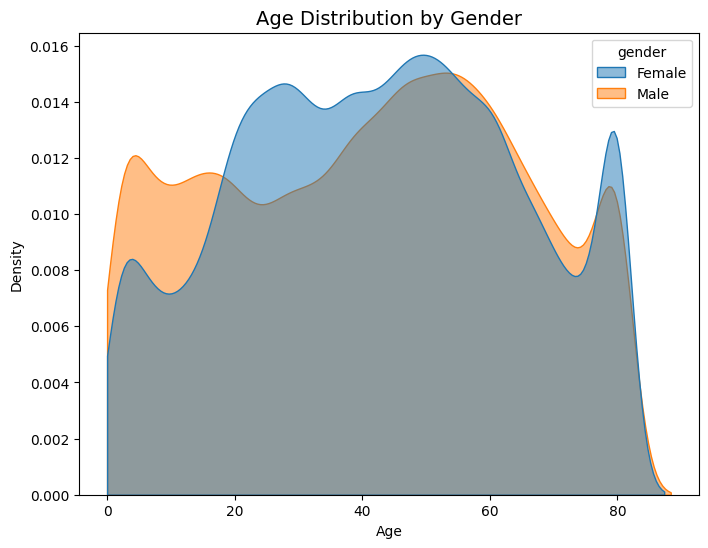

In [26]:
# Age distribution by gender
plt.figure(figsize=(8, 6))

sns.kdeplot(
    data=df,
    x="age",
    hue="gender",        # separate curves by gender
    fill=True,           # fill under the curves
    common_norm=False,   # each gender is normalized separately
    alpha=0.5,            # transparency
    clip=(0, None)
)

plt.title("Age Distribution by Gender", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

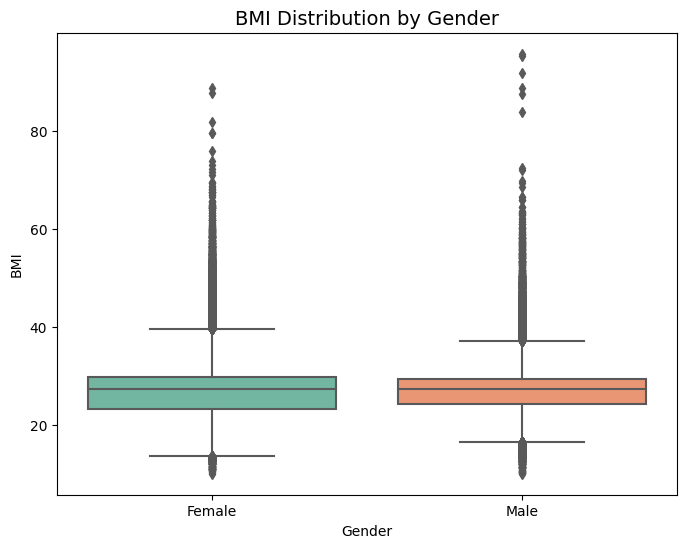

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

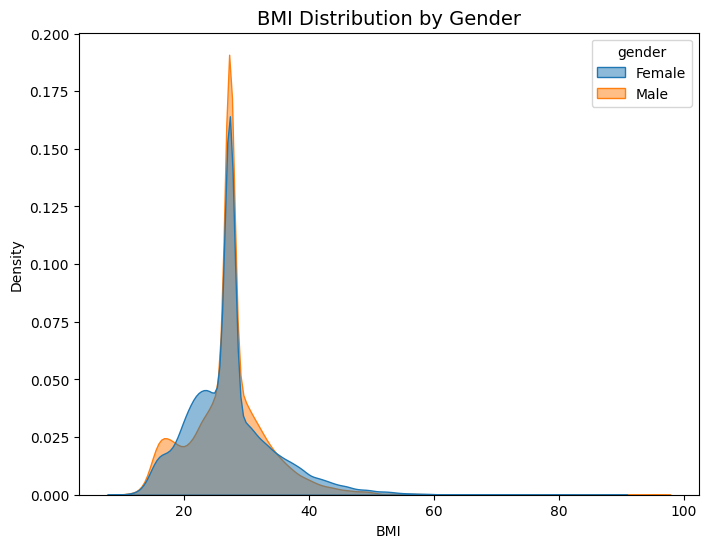

In [11]:
# BMI distribution Box Plot 
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=df,
    x="gender",
    y="bmi",
    palette="Set2"
)

plt.title("BMI Distribution by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.show()
# Plotting Age distribution by gender
plt.figure(figsize=(8, 6))

sns.kdeplot(
    data=df,
    x="bmi",
    hue="gender",        # separate curves by gender
    fill=True,           # fill under the curves
    common_norm=False,   # each gender is normalized separately
    alpha=0.5,            # transparency
    clip=(0, None)
)

plt.title("BMI Distribution by Gender", fontsize=14)
plt.xlabel("BMI")
plt.ylabel("Density")
plt.show()

BMI follows a normal distribution with most observations centered around 27. As obesity is already an established risk factor for diabetes, we will later transform the bmi variable into something more digestible by a ML model. Following the WHO classification, Normal weight: 18.5 – 24.9
Overweight: 25 – 29.9 Obese: ≥ 30, we'll create a new dummy variable "obese" that takes 1 if bmi >= 30 and 0 if it's < 30 

Let's explore the distribution of smoking history types in our data set using a bar chart. 

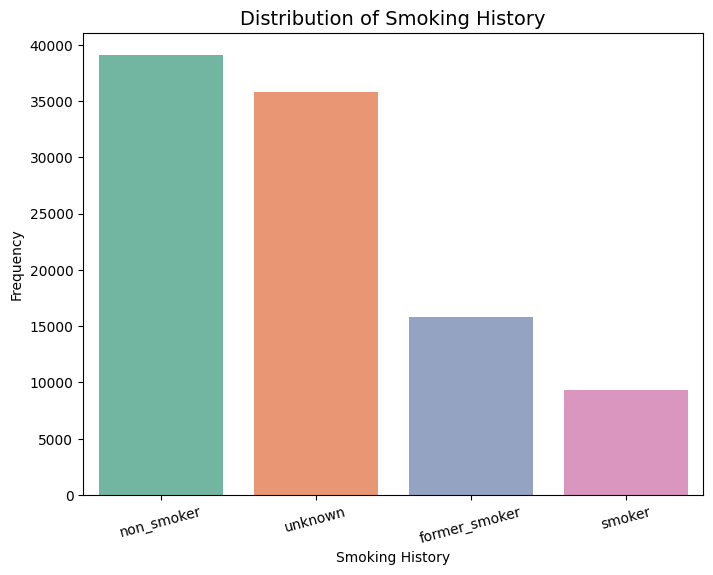

In [27]:
# Distribution of smoking history types using a bar chart. 
plt.figure(figsize=(8, 6))

sns.countplot(
    data=df,
    x="smoking_history",
    order=df['smoking_history'].value_counts().index,  # sort by frequency
    palette="Set2"
)

plt.title("Distribution of Smoking History", fontsize=14)
plt.xlabel("Smoking History")
plt.ylabel("Frequency")
plt.xticks(rotation=15)  # tilt labels if they're long
plt.show()

Smoking is a well established risk factor for diabetes, having a diversified set of different categories in this dataset will help give signal to the model to improve accuracy. Maybe we'll have to transform the unknown category to something that follows a prior distribution. 

In [28]:
# Frequency of subjects that have heart disease and hypertension and those that have both
df['hypertension_heartdisease'] = ((df['hypertension'] == 1) & (df['heart_disease'] == 1)).astype(int)
print (df.groupby('gender')[['hypertension', 'heart_disease', 'hypertension_heartdisease']].sum())

df_counts = pd.DataFrame({
    'gender': ['Female', 'Male'],
    'hypertension': [4197, 3288],
    'heart_disease': [1562, 2380],
    'hypertension_heartdisease': [393, 523]
})

# Melt dataframe to long format
df_long = df_counts.melt(
    id_vars='gender', 
    value_vars=['hypertension', 'heart_disease', 'hypertension_heartdisease'],
    var_name='Condition', 
    value_name='Count'
)

# Define custom colors
custom_colors = {
    'hypertension': '#FFB5A7',   # Peachy Pink
    'heart_disease': '#B5EAD7',  # Light Mint
    'hypertension_heartdisease': '#99C1DE'  # Soft Blue
}


# Create stacked bar chart with custom colors
fig = px.bar(
    df_long,
    x='gender',
    y='Count',
    color='Condition',
    color_discrete_map=custom_colors,
    title='Counts of Hypertension, Heart Disease, and Both by Gender',
    text='Count'
)

fig.update_layout(barmode='stack')
fig.show()

        hypertension  heart_disease  hypertension_heartdisease
gender                                                        
Female          4197           1562                        393
Male            3288           2380                        523


In [15]:
# Printing patients that either have hypertension and obesity or both
df['hypertension_obesity'] = ((df['hypertension'] == 1) & (df['obese'] == 1)).astype(int)
print (df.groupby('gender')[['hypertension', 'obese', 'hypertension_obesity']].sum())

        hypertension  obese  hypertension_obesity
gender                                           
Female          4197  14182                  1815
Male            3288   9348                  1431


In [29]:
# Plotting the frequency of patients having hypertension, obesity and both by gender
df_counts = pd.DataFrame({
    'gender': ['Female', 'Male'],
    'hypertension': [4197, 3288],
    'obesity': [14182, 9348],
    'hypertension_obesity': [1815, 1431]
})

# Melt dataframe to long format
df_long = df_counts.melt(
    id_vars='gender', 
    value_vars=['hypertension', 'obesity', 'hypertension_obesity'],
    var_name='Condition', 
    value_name='Count'
)

# Define custom colors
custom_colors = {
    'hypertension': '#FFB5A7',   # Peachy Pink
    'obesity': '#B5EAD7',  # Light Mint
    'hypertension_obesity': '#99C1DE'  # Soft Blue
}

# Create stacked bar chart with custom colors
fig = px.bar(
    df_long,
    x='gender',
    y='Count',
    color='Condition',
    color_discrete_map=custom_colors,
    title='Counts of Hypertension, Obesity, and Both by Gender',
    text='Count'
)

fig.update_layout(barmode='stack')
fig.show()

==> We clearly see more female patients suffering from obesity than male patients in this dataset. 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



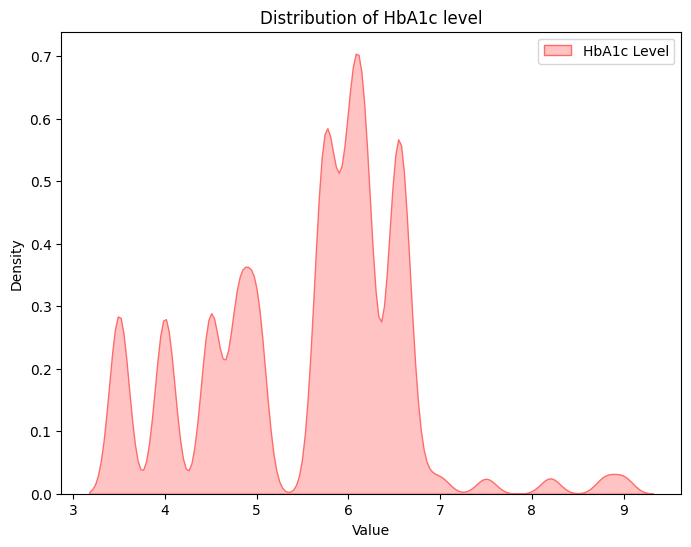

In [17]:
# Plotting HbA1c_level and blood_glucose_level distribution 
plt.figure(figsize=(8,6))

# KDE for HbA1c_level
sns.kdeplot(data=df, x="HbA1c_level", label="HbA1c Level", fill=True, alpha=0.4, color="#FF6B6B")

# KDE for blood_glucose_level
#sns.kdeplot(data=df, x="blood_glucose_level", label="Blood Glucose Level", fill=True, alpha=0.4)

plt.title("Distribution of HbA1c level")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



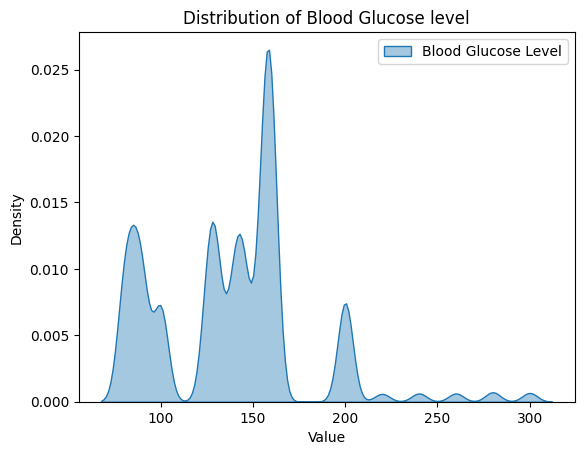

In [18]:
# KDE for blood_glucose_level
sns.kdeplot(data=df, x="blood_glucose_level", label="Blood Glucose Level", fill=True, alpha=0.4 )

plt.title("Distribution of Blood Glucose level")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

#### In the previous section, we have visualized our candidate independent variables. Now It's time to take a look at our target: Diabetes

gender
Female    4461
Male      4039
Name: diabetes, dtype: int64


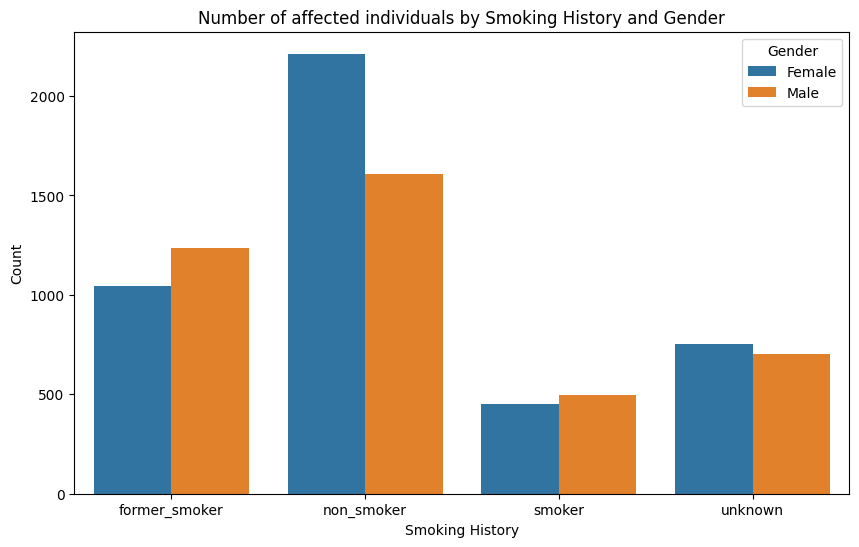

In [19]:
# Diabetes prevalence based on gender
print (df.groupby('gender')['diabetes'].sum())
grouped = df.groupby(['gender', 'smoking_history'])['diabetes'].sum()
df_counts = grouped.reset_index(name="count")
# Plot as a grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_counts,
    x="smoking_history",
    y="count",
    hue="gender"
)
plt.title("Number of affected individuals by Smoking History and Gender")
plt.xlabel("Smoking History")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

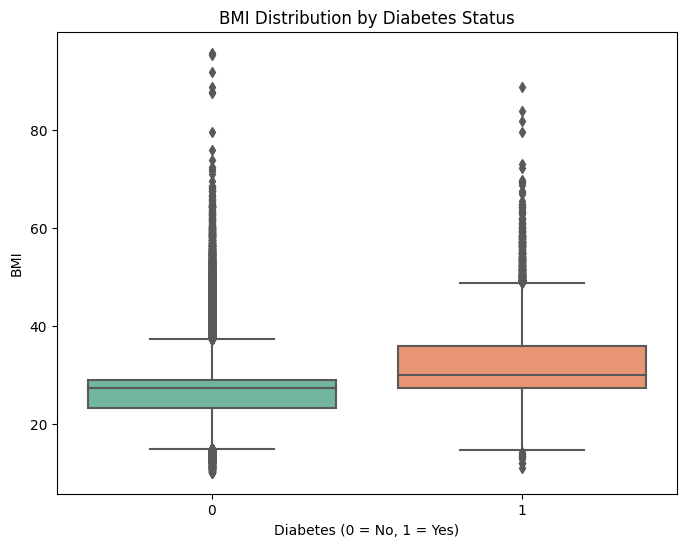

In [30]:
# Box plot of BMI distibution by diabetes status
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="diabetes",
    y="bmi",
    palette="Set2"
)
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



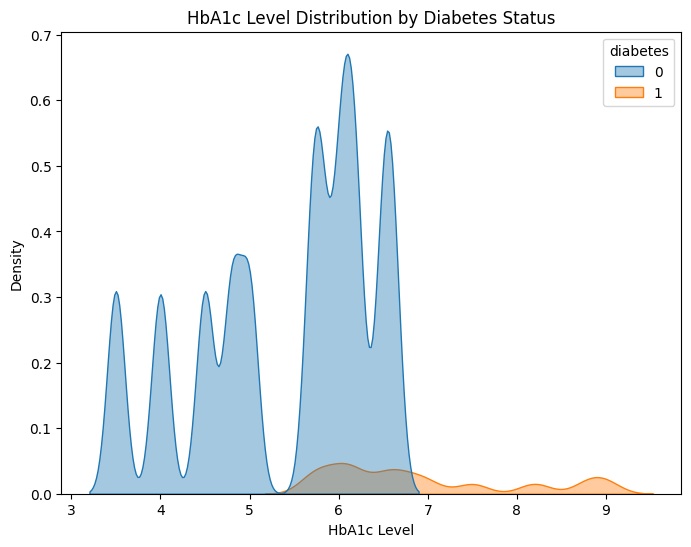

In [21]:
# HbA1c distribution by Diabetes status
plt.figure(figsize=(8,6))
sns.kdeplot(
    data=df, x="HbA1c_level",
    hue="diabetes",
    fill=True, alpha=0.4
)
plt.title("HbA1c Level Distribution by Diabetes Status")
plt.xlabel("HbA1c Level")
plt.ylabel("Density")
plt.show()

HbA1c level is an indicator of diabetes plotting these distributions confirms the consistency of the data.

#### Correlation Heatmap

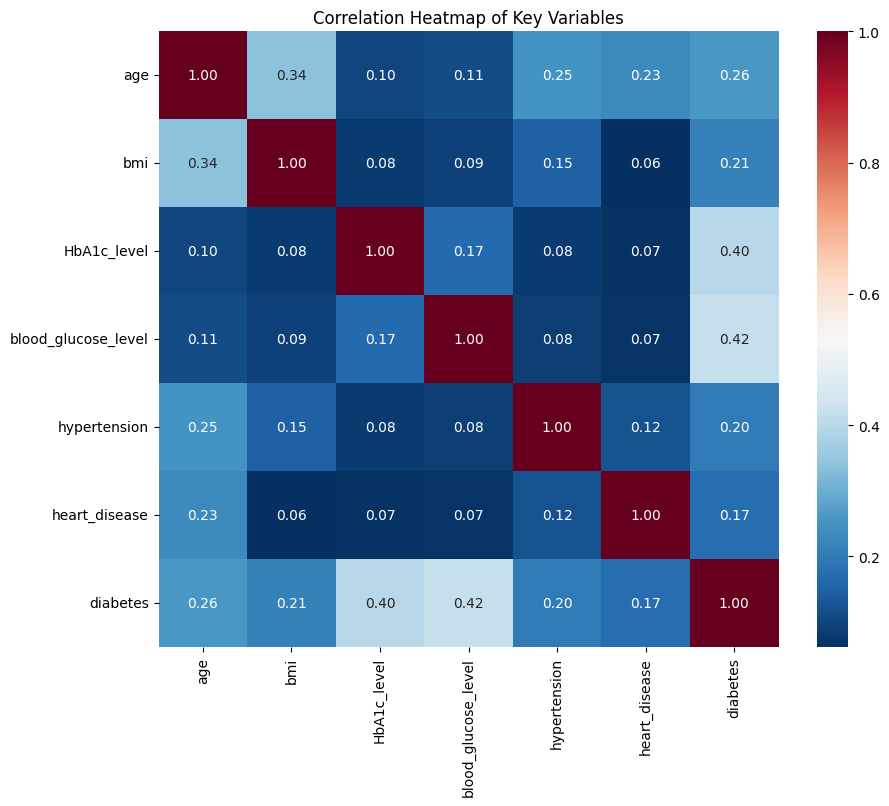

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(
    df[["age","bmi","HbA1c_level","blood_glucose_level",
        "hypertension","heart_disease","diabetes"]].corr(),
    annot=True,
    cmap="RdBu_r",
    fmt=".2f"
)
plt.title("Correlation Heatmap of Key Variables")
plt.show()

As expected, HbA1c and blood glucose levels are highly correlated with diabetes since they are direct indicators of diabetes.

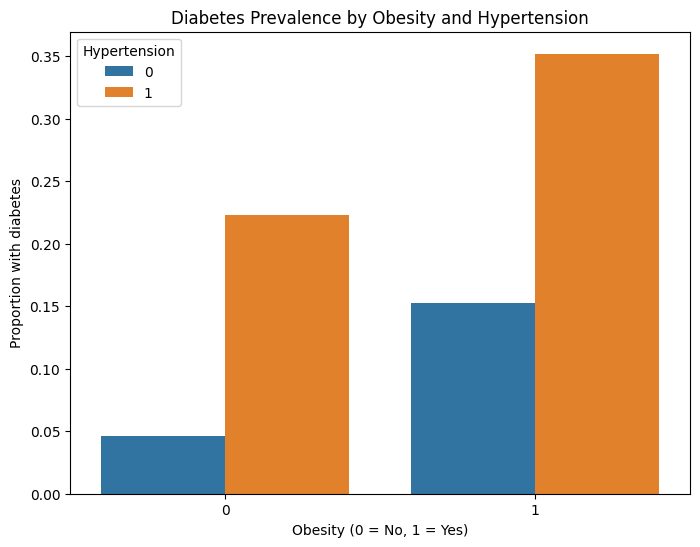

In [36]:
# Plotting diabetes prevalence by obesity and hypertension
plt.figure(figsize=(8,6))
sns.barplot(
    data=df,
    x="obese",
    y="diabetes",
    hue="hypertension",
    estimator=lambda x: sum(x)/len(x),  # proportion
    errorbar=None
)
plt.title("Diabetes Prevalence by Obesity and Hypertension")
plt.xlabel("Obesity (0 = No, 1 = Yes)")
plt.ylabel("Proportion with diabetes")
plt.legend(title="Hypertension")
plt.show()

It's clear from this chart that obesity and hypertension are both significant risk factors for diabetes developement.